In [1]:
import numpy as np
import torch as t
from bitarray import bitarray
import matplotlib.pyplot as plt

In [2]:
def int_to_binary_list(i,w=None):
    b = bitarray(np.binary_repr(i,w))
    return np.array(b.tolist()).astype('float32')

def int_list_to_binary_array(l, w=None):
    return np.stack([int_to_binary_list(i,w) for i in l], axis=0)

In [3]:
evens = [i for i in range(120) if i%2==0]
data = int_list_to_binary_array(evens,8)
odds = [i for i in range(20,70) if i%2==1]
odd_data = int_list_to_binary_array(odds,8)

In [4]:
hi_evens = [i for i in range(200,256) if i%2==0]
hi_data = int_list_to_binary_array(hi_evens,8)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
(train_data, test_data) = train_test_split(data, test_size=0.25)

In [7]:
hidden = 24
model = t.nn.Sequential(t.nn.Linear(8,hidden), t.nn.ReLU(), 
                        t.nn.Linear(hidden,8), t.nn.Sigmoid())

In [8]:
opt = t.optim.Adam(model.parameters(), lr=0.0001)

In [9]:
loss_func = t.nn.MSELoss()

In [10]:
t_train_data = t.from_numpy(train_data)
t_test_data  = t.from_numpy(test_data)
t_odd_data = t.from_numpy(odd_data)
t_hi_data = t.from_numpy(hi_data)

In [11]:
%%time
for epoch in range(40000):
    opt.zero_grad()
    out = model(t_train_data)
    loss =  loss_func(out, t_train_data)
    loss.backward()
    opt.step()

loss_func(model(t_train_data), t_train_data)    

CPU times: user 17.3 s, sys: 501 ms, total: 17.8 s
Wall time: 17.9 s


tensor(2.3002e-09, grad_fn=<MseLossBackward>)

In [12]:
list(model.parameters())[3].grad

tensor([4.0706e-11, 1.0829e-10, 1.1326e-10, 1.1086e-10, 1.5585e-10, 1.2411e-10,
        1.3604e-10, 4.0900e-11])

In [13]:
loss_func(model(t_train_data), t_train_data)

tensor(2.3002e-09, grad_fn=<MseLossBackward>)

In [14]:
loss_func(model(t_test_data), t_test_data)

tensor(4.8449e-08, grad_fn=<MseLossBackward>)

In [15]:
train_out = model(t_train_data)
test_out  = model(t_test_data)
hi_out = model(t_hi_data)

In [16]:
(t_train_data>0.5)== (train_out>0.5)

tensor([[True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True,

In [17]:
(t_test_data>0.5)== (test_out>0.5)

tensor([[True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True]])

In [18]:
(model(t_odd_data) >0.5) == (t_odd_data >0.5)

tensor([[ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False],
        [ 

In [19]:
(model(t_hi_data) >0.5) == (t_hi_data >0.5)

tensor([[False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [False,  True,  True,  True,  True,  True,  True,  True],
        [F

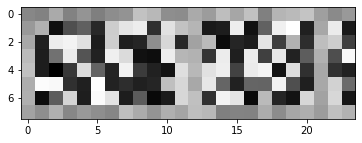

In [20]:
plt.imshow(list(model.parameters())[0].detach().numpy().T, cmap='Greys');

In [21]:
list(model.parameters())[2].shape

torch.Size([8, 24])

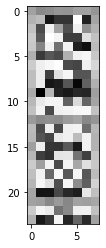

In [22]:
plt.imshow(list(model.parameters())[2].detach().numpy().T, cmap='Greys');